# Linear Model for Regression and Classification

**Agenda**



1.   Simple Linear Regression using Ordinare least square
2.   Gradient decent algorithm
3.   Regularized regression methods- Ridge, Lasso, and ElasticNet
4.   Logistic Regression for classification
5.   Online Learning methods- Stochastic Gradient decent & Passive Aggrasive
6.   Robust Regression- Dealing with outliers and Model errors
7.   Polynomial Regression
8.   Bias-Variance Tradeoff



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**Simple Linear Regression**
The relationship between the dependent variable and one or more independent variable are called as Linear Regression.


*   y represents the dependent variable or the variable we are trying to predict.
*   x represents one or more independent variables or predictors.
*   w's represent weights or coef's for each feature, w0 is intercept.
*   Relation between feature & target is represented by the following equation:

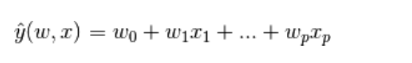


In [2]:
from sklearn.linear_model import LinearRegression

# LINEAR REGRESSION

Best Fit Line:  also known as the regression line, is the straight line that represents the most optimal or best-fitting linear relationship between the dependent variable and one or more independent variables in a linear regression model. The best fit line is taken when RSS is minimum or can say error between predicted value and actual value.


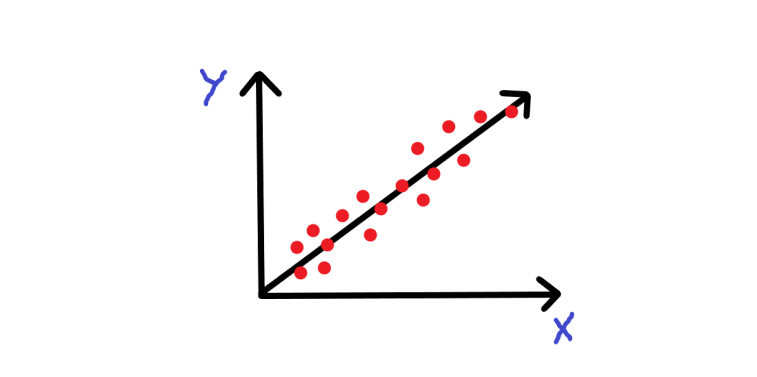

Residual Squared Sum (RSS) of Error - Sum of square of difference between actual value & predicted value

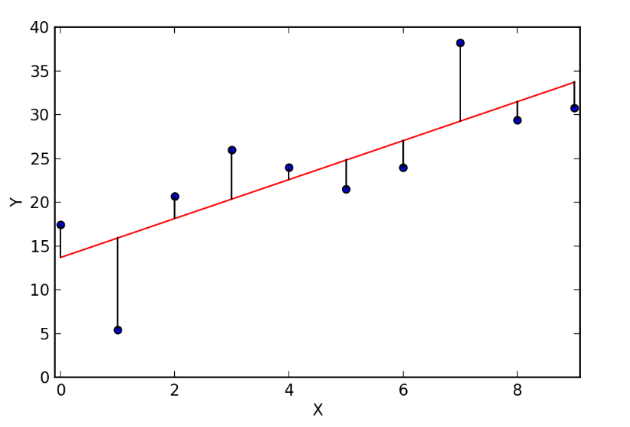

# GRADIENT DESCENT

*   LinearRegression tries to minimize RSS using Gradient Descent.
*   The objective of Gradient Descent is the obtain best weights such that RSS is minimal.

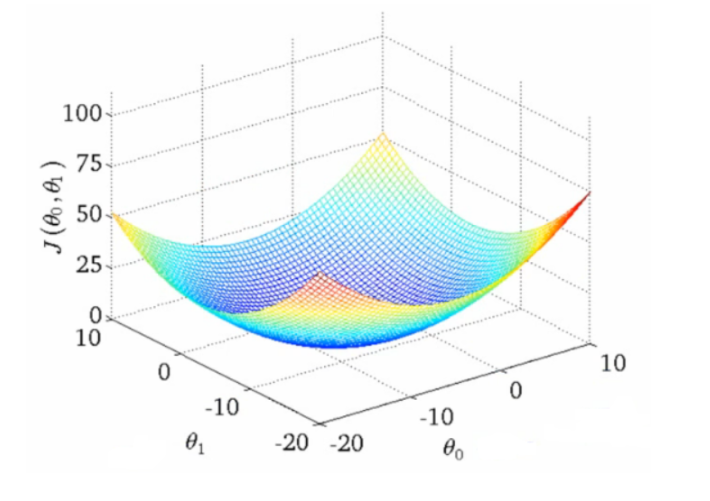

# Maths behind gradient descent with simplified notation

*   Prediction, y(p) = Ax + B
*   Simplified Loss for caclulation, Loss = 1/2 * Σ(Yp-Y)^2
*   Algorithm
    *   Randomly initialize weights A & B
    *   Calculate gradient .i.e change in Loss when A & B are changed.
    *   Change weights by gradients calculated & reduce the loss
    *   Repeat the whole process till weights don't significantly reduce any further


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

# Generating Regression Dataset

*   n_features = number of features to be considered,
*   noise = deviation from straight line
*   n_samples = number of samples

In [4]:
from sklearn.datasets import make_regression
X, Y = make_regression(n_features = 1, noise = 10, n_samples = 1000)

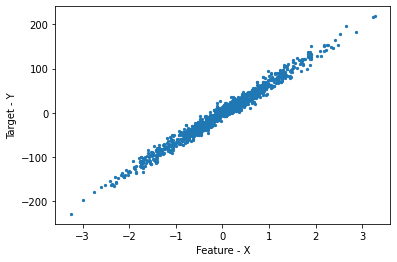

In [5]:
plt.xlabel('Feature - X')
plt.ylabel('Target - Y')
plt.scatter(X,Y,s=5)

# Hyperparameter
A hyperparameter is a configuration setting used to control the training process of a machine learning model. It is an initial method to configure models.

#### Common Hyperparameters
* fit_interceprt - Whether to calculate intercept for the model, not required if data is centered
* normalize - X will be normalized by subtracting mean & dividing by standard deviation

* <b>PS: By stanrdadizing data before subjecting to model, coef's tells the importance of features</b>

#### Common Attributes
* coef - weights for each independent variables
* intercept - bias of independent term of linear models

#### Common Functions
* fit - trains the model. Takes X & Y
* predict - Once model is trained, for given X using predict function Y can be predicted

#### Multiple Target
* Y can be of more than 1 dimension
* Advantages of multiple target are 
  - computationally fast
  - model is optimized for multiple targets
  - model do not use relationship between targets
  - model is more interpretable

### Training model
* X should be in rows of data format, X.ndim == 2 (.ndim: This is an attribute or method (depending on the library) that returns the number of dimensions (axes) in the array. For example, a 1D array (vector) has 1 dimension, a 2D array (matrix) has 2 dimensions, and so on. 
X.ndim == 2: This is a comparison. It checks whether the number of dimensions in X is equal to 2.)
* Y should be 1D for single target & 2D for more than one target
* fit function for training the model

In [6]:
lr = LinearRegression()

In [7]:
lr.fit(X, Y)

LinearRegression()

In [8]:
lr.coef_

array([66.34860902])

In [19]:
lr.intercept_ == False

False

In [20]:
pred = lr.predict(X)
X

array([[-3.16453010e-01],
       [-1.40867901e+00],
       [ 2.02061733e-01],
       [-2.27468855e+00],
       [-1.40999852e+00],
       [ 1.04475317e+00],
       [ 1.03000356e+00],
       [-2.70992042e-01],
       [ 2.54378176e-02],
       [-2.64710901e-01],
       [-6.45406674e-01],
       [ 7.00787532e-01],
       [ 6.57493709e-01],
       [ 2.55976418e-01],
       [ 3.19653440e-01],
       [ 3.52003608e-01],
       [-1.01139131e-01],
       [ 1.66299903e+00],
       [ 1.50781830e+00],
       [ 1.88989865e+00],
       [-1.74129360e+00],
       [ 1.89063000e+00],
       [-1.06501898e-01],
       [ 3.31290179e-03],
       [ 3.78329426e-01],
       [ 1.36712171e+00],
       [-7.27080172e-01],
       [-1.70102045e+00],
       [-1.41427219e+00],
       [-1.75500035e+00],
       [-5.56121526e-02],
       [-4.47371653e-01],
       [-6.50973918e-01],
       [ 1.06934377e+00],
       [-6.29279309e-01],
       [-8.62758036e-01],
       [ 2.71759613e-01],
       [-5.61757199e-01],
       [-5.7

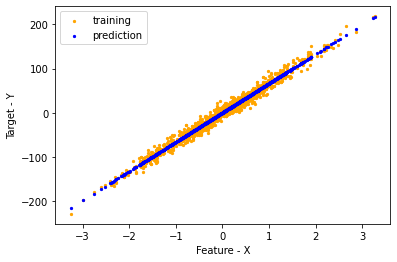

In [21]:
plt.scatter(X, Y, s=5, color='orange', label='training')
plt.scatter(X, pred, s=5, color='blue', label='prediction')
plt.xlabel('Feature - X')
plt.ylabel('Target - Y')
plt.legend()
plt.show()

#### Limitation of Ordinary Least Square Technique
* Impacted by Outliers
* Non-linearities 
* Too many independent variables
* Multicollinearity 
* Heteroskedasticity
* Noise in the Independent Variables
* <a href="http://www.clockbackward.com/2009/06/18/ordinary-least-squares-linear-regression-flaws-problems-and-pitfalls/">References</a>

# Ridge

Ridge regression, also known as L2 regularization, is a linear regression technique used in statistics 
and machine learning to address the issue of multicollinearity (high correlation between independent variables) 
and to prevent overfitting. It does this by adding a regularization term to the linear regression cost function.

In [23]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1)
ls = LinearRegression()

ridge.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1])
ls.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1])

LinearRegression()

In [24]:
ridge.coef_

array([0.44186047, 0.44186047])

In [25]:
ls.coef_

array([0.475, 0.475])

In [29]:
outliers = Y[950:] - 600

In [30]:
import numpy as np
Y_out = np.append(Y[:950], outliers)

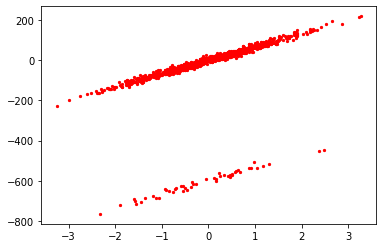

In [33]:
plt.scatter(X, Y_out, s=5, color="red")

In [34]:
ls.fit(X,Y_out)

LinearRegression()

In [35]:
pred_out = ls.predict(X)

Text(0.5, 1.0, 'Linear Regression')

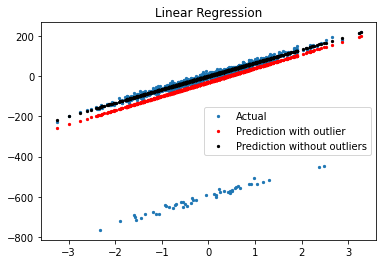

In [42]:
plt.scatter(X, Y_out, s=5, label="Actual")
plt.scatter(X, pred_out, s=5, color = "red", label="Prediction with outlier")
plt.scatter(X, pred, s=5, color = "black", label="Prediction without outliers")
plt.legend()
plt.title("Linear Regression")

In [43]:
lr.coef_

array([66.34860902])

In [44]:
from sklearn.linear_model import Ridge

In [46]:
ridge = Ridge(alpha = 1000)

In [47]:
ridge.fit(X, Y_out)

Ridge(alpha=1000)

In [48]:
ridge_pred = ridge.predict(X)

Text(0.5, 1.0, 'Ridge regression')

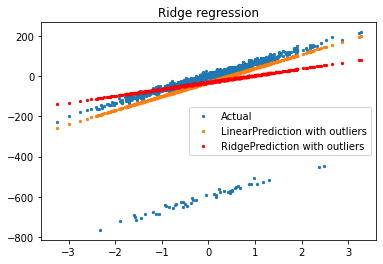

In [50]:
plt.scatter(X, Y_out, s=5, label="Actual")
plt.scatter(X, pred_out, s=5, label="LinearPrediction with outliers")
plt.scatter(X, ridge_pred, s=5, color = "red", label="RidgePrediction with outliers")
plt.legend()
plt.title("Ridge regression")

In [51]:
ridge.coef_

array([33.86496721])